# Scatterplots
If we want to inspect the relationship between two numeric variables, the standard choice of plot is the scatterplot. In a scatterplot, each data point is plotted individually as a point, its x-position corresponding to one feature value and its y-position corresponding to the second

In [ ]:
# importing necessary liberaries
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import pandas as pd
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Example 1 a. Scatter plot showing negative correlation between two variables


### matplotlib.pyplot.scatter()


In [ ]:
fuel_data = pd.read_csv('/content/drive/MyDrive/Data Folder /fuel-econ.csv')
fuel_data.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


Text(0, 0.5, 'Combined Fuel Eff. (mpg)')

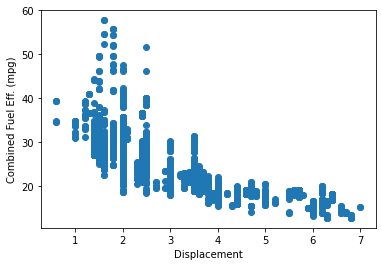

In [ ]:
# relation between engine displacement in liters and overal fuel miles in galons
# is the large engine assosiated with higher fuel efficiency or lower ?
plt.scatter(data=fuel_data ,x='displ' ,y='comb')
plt.xlabel('Displacement')
plt.ylabel('Combined Fuel Eff. (mpg)')

### In the example above, the relationship between the two variables is negative because as higher values of the x-axis variable are increasing, the values of the variable plotted on the y-axis are decreasing.

# Example 1 b. Scatter plot showing negative correlation between two variables


### seaborn.regplot()

Text(0, 0.5, 'Combined Fuel Eff. (mpg)')

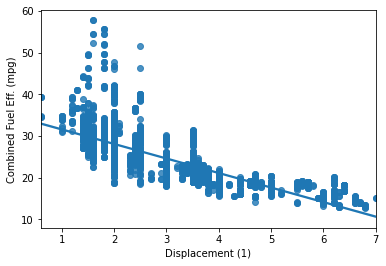

In [ ]:
sb.regplot(data=fuel_data ,x='displ' ,y='comb')
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)')

Text(0, 0.5, 'Combined Fuel Eff. (mpg)')

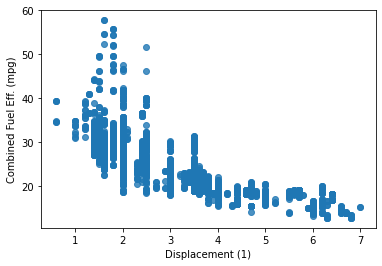

In [ ]:
# I can turn off the regression line by : fit_reg=False
sb.regplot(data=fuel_data ,x='displ' ,y='comb', fit_reg=False)
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)')

# Example 2. Scatter plot showing a positive correlation between two variables


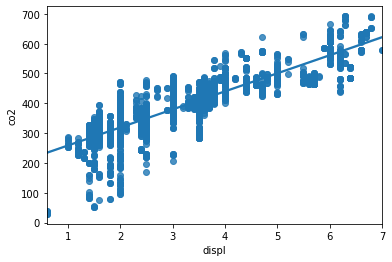

In [ ]:
sb.regplot(data=fuel_data ,x='displ' ,y='co2')

# Example 3. Plot the regression line on the transformed data


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


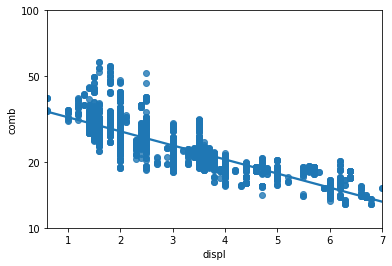

In [ ]:
def log_trans(x,inverse =False):
  if not inverse:
    return np.log10(x)
  else:
    return np.power(10,x)

sb.regplot(fuel_data['displ'] ,fuel_data['comb'].apply(log_trans));
tick_locs=[10 ,20,50,100]
plt.yticks(log_trans(tick_locs),tick_locs);

# Overplotting, Transparency, and Jitter
If we have a very large number of points to plot or our numeric variables are discrete-valued,The visualization will suffer from overplotting, where the high amount of overlap in points makes it difficult to see the actual relationship between the plotted variables.

# Example 1. Jitter - Randomly add/subtract a small value to each data point



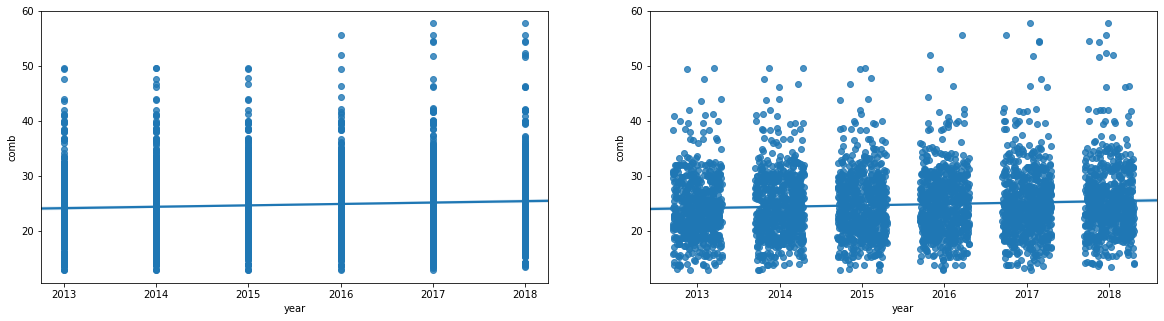

In [ ]:
# Resize figure to accommodate two plots
plt.figure(figsize=[20,5]);

#plot in left : simpe scatter
plt.subplot(1,2,1);
sb.regplot(data = fuel_data, x = 'year', y = 'comb', truncate=False);


# PLOT ON RIGHT - SCATTER PLOT WITH JITTER
plt.subplot(1,2,2)
sb.regplot(data=fuel_data,x = 'year', y = 'comb',truncate=False, x_jitter=0.3);

### 1. In the sb.regplot() function below, the `truncate` argument accepts a    boolean.
### 2. If truncate=True, the regression line is bounded by the data limits. 
### 3. Else if truncate=False, it extends to the x axis limits.
### 4. The x_jitter will make each x value will be adjusted randomly by +/-0.3

# Example 2. Plot with both Jitter and Transparency


###
In the left scatter plot above, the degree of variability in the data and strength of relationship are fairly unclear. In cases like this, we may want to employ transparency and jitter to make the scatterplot more informative. The right scatter plot has a jitter introduced to the data points.

You can add transparency to either scatter() or regplot() by adding the "alpha" parameter set to a value between 0 (fully transparent, not visible) and 1 (fully opaque). See the example below.

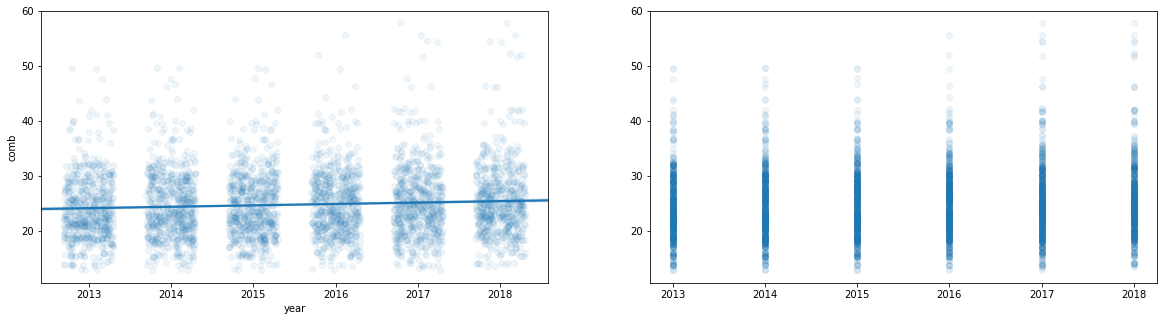

In [ ]:
# Resize figure to accommodate two plots
plt.figure(figsize=[20,5]);
#plot in left : seaborn plot
# The scatter_kws helps specifying the opaqueness of the data points. 
# The alpha take a value between [0-1], where 0 represents transparent, and 1 is opaque. 
plt.subplot(1,2,1);
sb.regplot(data=fuel_data ,x='year' ,y='comb',truncate=False ,x_jitter=0.3 ,scatter_kws={'alpha':1/15})

# PLOT ON RIGHT - matplotlib
# Alternative way to plot with the transparency.
# The scatter() function below does NOT have any argument to specify the Jitter
plt.subplot(1,2,2);
plt.scatter(data=fuel_data,x='year' ,y='comb',alpha=1/15);